## 진해여자고등학교 AI 창의 융합 독서 프로젝트 (코딩제작활동)
> 2025년 7월 18-19  
> 📄 강사: **백대성** (젤리코딩 원장) | ✉️ dsbaek898@icloud.com

# 📗 KNN(K-Nearest Neighbors) 개념 익히기

## 🎯 목표

우리는 데이터를 보고 **비슷한 패턴이나 속성**을 가진 것들을 분류하거나 추천하는 방법을 배우고자 합니다.  
특히, **"가장 가까운 이웃이 누구냐?"**에 따라 결정을 내리는 **K-최근접 이웃(KNN)** 알고리즘의 원리를 익힙니다.

---

## 1️⃣ 직관적으로 생각해보자!

다음과 같은 상황을 상상해봅시다:

> 나는 새로운 도시에 이사 왔어요.  
> 이 동네에서 가장 인기 있는 음식은 뭘까?

가장 빠른 방법은?

→ **근처에 사는 사람들**(이웃)에게 물어보는 것이겠죠.  
가까운 사람들이 햄버거를 좋아한다면 나도 그럴 가능성이 높습니다.

이게 바로 KNN의 핵심입니다:

> **"가까운 이웃들이 어떤 선택을 했는가?"에 따라 나의 선택을 결정한다!**

---

## 2️⃣ KNN이란?

KNN(K-Nearest Neighbors)은 다음과 같이 작동합니다:

1. 새로운 데이터가 들어오면
2. 기존 데이터 중에서 **가장 가까운 K개를 고르고**
3. 그들 중 가장 많은 클래스를 보고 **분류** 또는 **추천**합니다.

이 방법은 분류(classification)뿐만 아니라 추천 시스템, 작물 선택, 소비자 분석 등 **현실 문제에 자주 사용됩니다**.

---

## 3️⃣ 시각적으로 연습해보자

아래는 단순한 2차원 공간(온도 vs 강수량)에 여러 도시가 존재할 때,  
**"최근의 기후 조건이 주어졌을 때 어떤 작물을 추천할 것인가?"**를  
KNN으로 분류해보는 예제입니다.

기본 아이디어는 이렇습니다:

- 도시별로 **기온, 강수량 데이터**를 가지고 있음  
- 각 작물은 **선호하는 기후 조건**이 다름  
- 과거 데이터를 학습하여, **현재 조건과 가장 비슷한 조건을 가진 도시들**의 작물 추천을 따릅니다

---

## 4️⃣ 작물 추천 예시: 왜 KNN이 좋은가?

기존의 회귀 방식은 수학적 식을 이용해 예측합니다.  
하지만 KNN은 **"이웃을 직접 보고 결정"**합니다.

예를 들어:

- 올해 진주의 기후가 과거 창원의 2017년과 비슷하다면?  
  → 그때 추천되었던 작물을 참고할 수 있습니다.

따라서 KNN은 **"경험 기반"**의 알고리즘이라고 할 수 있으며,  
기후 변화처럼 **예측이 어렵고 선형성이 보장되지 않는 문제**에서 특히 유용합니다.

---

## 5️⃣ 실제 데이터 예시와 구조

이 노트북에서는 다음과 같은 흐름을 따릅니다:

1. 간단한 2D KNN 분류 시각화 (파란색/빨간색 점들 중 어디에 가까운가)
2. 경남 5개 도시의 15년간 기후 데이터를 생성
3. 각 작물의 기후 선호 조건 정의
4. 각 도시-연도별 작물 점수 계산
5. 가장 적합한 작물을 `BestCrop`으로 레이블링
6. KNN 분류기로 학습 → 최신년도 데이터를 기반으로 작물 추천 실행
7. 결과 시각화 (Temperature vs Rainfall 평면에 추천된 작물 분포)

---

## ✨ 핵심 개념 정리

- KNN은 단순하지만, **직관적이며 해석이 쉬운 분류 알고리즘**입니다.
- 비슷한 조건(이웃)을 찾아 분류하기 때문에, **복잡한 모델 없이도 효과적인 결과**를 얻을 수 있습니다.
- 다양한 분야(의료, 농업, 마케팅 등)에서 실제로 활용되고 있습니다.

---

## 🧠 생각해볼 질문

1. 왜 "가장 가까운 이웃"이 나와 비슷하다고 생각할 수 있을까요?
2. 이웃의 수 `K`를 3개, 5개, 10개로 바꾸면 결과는 어떻게 달라질까요?
3. 작물 추천 문제에서 KNN보다 회귀(직선 모델)가 더 적절한 상황은 언제일까요?
4. 기후 데이터 외에 어떤 요소를 넣으면 더 나은 추천이 가능할까요?

---

이제 여러분은 KNN이 단순한 알고리즘이지만,  
현실의 복잡한 문제에서도 매우 유용하게 활용된다는 점을 직접 확인하게 되었습니다! 👣



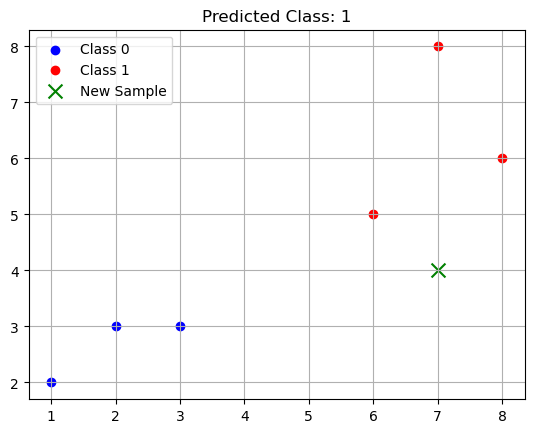

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 기존 데이터
X = np.array([[1, 2], [2, 3], [3, 3], [6, 5], [7, 8], [8, 6]])
y = np.array([0, 0, 0, 1, 1, 1])  # 0: Blue, 1: Red

# 새로운 샘플
X_test = np.array([[7, 4]])

# 모델 생성 및 훈련
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# 예측
pred = model.predict(X_test)[0]

# 시각화
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')
plt.scatter(X_test[0,0], X_test[0,1], color='green', marker='x', s=100, label='New Sample')
plt.title(f'Predicted Class: {pred}')
plt.grid(True)
plt.legend()
plt.show()


📗 2. KNN을 이용한 경남 시군 작물 추천

앞서 구성한 경남 지역 기후 데이터와 작물별 생육조건을 바탕으로
KNN 분류 모델을 만들어 작물 추천을 수행합니다.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시군 이름
cities = ['Changwon', 'Jinju', 'Miryang', 'Hamyang', 'Geoje']

# 연도
years = np.arange(2010, 2025)

# 지역별 기온 및 강수량 생성 (도시별 편차 존재)
np.random.seed(42)
data = []
for city in cities:
    temp_base = 13.5 + np.random.rand() * 1.5  # 도시마다 온도 베이스 다름
    rain_base = 1000 + np.random.rand() * 200
    
    for year in years:
        temperature = temp_base + 0.03 * (year - 2010) + np.random.normal(0, 0.1)
        rainfall = rain_base + 5 * np.sin((year - 2010) * 0.4) + np.random.normal(0, 20)
        data.append([city, year, round(temperature, 2), round(rainfall, 2)])

df = pd.DataFrame(data, columns=["City", "Year", "Temperature", "Rainfall"])
df.head()

,City,Year,Temperature,Rainfall
0,Changwon,2010,14.13,1220.60
1,Changwon,2011,14.07,1187.41
2,Changwon,2012,14.28,1209.08
3,Changwon,2013,14.10,1205.65
4,Changwon,2014,14.14,1185.83


In [4]:
# 작물 종류와 선호 조건 (기온, 강수량 범위)
crops = {
    'SweetPotato':  {'T_opt': 16,  'R_opt': 1000},
    'Apple':        {'T_opt': 14,  'R_opt': 900},
    'Blueberry':    {'T_opt': 13.5,'R_opt': 1100},
    'Peach':        {'T_opt': 15.5,'R_opt': 950},
    'Garlic':       {'T_opt': 13,  'R_opt': 850}
}


In [5]:
# 작물 선호 점수 계산 함수 (온도와 강수량에서의 거리 기반)
def crop_score(temp, rain, T_opt, R_opt):
    t_score = np.exp(-((temp - T_opt)**2) / 2)
    r_score = np.exp(-((rain - R_opt)**2) / 5000)
    return t_score * r_score

# 작물별 점수 계산
for crop, params in crops.items():
    df[crop] = df.apply(lambda row: crop_score(row['Temperature'], row['Rainfall'], params['T_opt'], params['R_opt']), axis=1)

df.head()


,City,Year,Temperature,Rainfall,SweetPotato,Apple,Blueberry,Peach,Garlic
0,Changwon,2010,14.13,1220.60,0.000010,1.171100e-09,0.044721,1.707062e-07,6.210766e-13
1,Changwon,2011,14.07,1187.41,0.000138,6.668061e-08,0.184418,4.573867e-06,7.292777e-11
2,Changwon,2012,14.28,1209.08,0.000036,4.845142e-09,0.068297,7.024516e-07,2.784677e-12
3,Changwon,2013,14.10,1205.65,0.000035,7.643697e-09,0.089601,7.898802e-07,5.632969e-12
4,Changwon,2014,14.14,1185.83,0.000178,7.933727e-08,0.186718,5.856504e-06,8.350139e-11


In [6]:
from sklearn.neighbors import KNeighborsClassifier

# 각 행마다 가장 적합한 작물 이름을 라벨로 부여 (정답값)
df['BestCrop'] = df[crops.keys()].idxmax(axis=1)

# 학습용 입력 (기온과 강수량만 사용)
X_train = df[['Temperature', 'Rainfall']]
y_train = df['BestCrop']


In [7]:
# KNN 모델 (k=3 사용)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 예측을 위한 최신년도 기후 데이터
X_test = df[df['Year'] == df['Year'].max()][['Temperature', 'Rainfall']]
cities_test = df[df['Year'] == df['Year'].max()]['City']

# 예측 실행
y_pred = knn.predict(X_test)

# 결과 출력
results = pd.DataFrame({
    'City': cities_test.values,
    'PredictedCrop_KNN': y_pred
})

results


,City,PredictedCrop_KNN
0,Changwon,Blueberry
1,Jinju,Blueberry
2,Miryang,Blueberry
3,Hamyang,Blueberry
4,Geoje,Blueberry


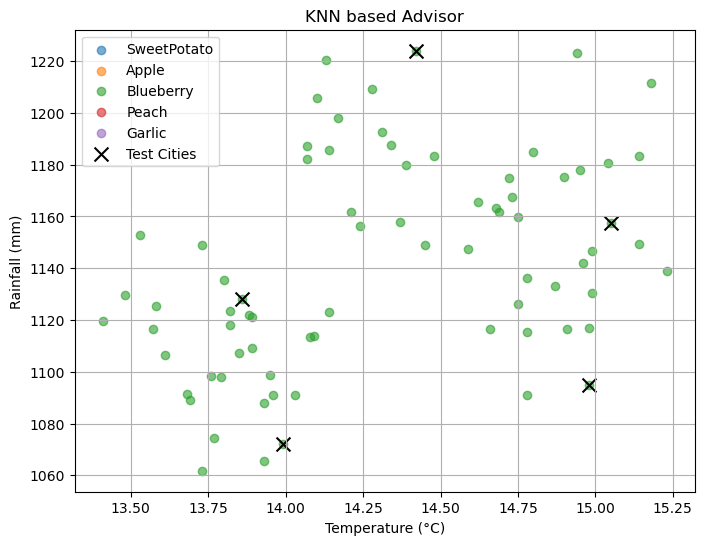

In [8]:
plt.figure(figsize=(8, 6))

for crop_name in crops.keys():
    sub = df[df['BestCrop'] == crop_name]
    plt.scatter(sub['Temperature'], sub['Rainfall'], label=crop_name, alpha=0.6)

# 테스트 샘플(최근년도) 표시
plt.scatter(X_test['Temperature'], X_test['Rainfall'], marker='x', color='black', label='Test Cities', s=100)

plt.title("KNN based Advisor")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.legend()
plt.show()


---

## 🧠 재미있는 질문 3가지: KNN을 탐정처럼 생각해보자!

---

### ❓ 질문 1. "내 옆집은 왜 중요한가요?"

> 여러분이 전학 간 학교에서, **같은 반 친구들 중 누가 여러분과 비슷한 성향일지** 알아보려면 어떻게 하시겠어요?  
> 그냥 "느낌적으로" 고르기보다는,  
> **나랑 취미, 말투, 앉은 자리, 점심시간 동선**이 비슷한 친구를 먼저 찾을 거예요.  

**Q.**  
KNN 알고리즘은 이런 상황에서 어떤 식으로 친구를 추천해줄까요?  
누가 ‘가장 가까운 이웃’인지, 어떤 기준으로 판단하나요?

---

### ❓ 질문 2. "블루베리 도시의 음모"

> 작년까지만 해도 사과가 잘 자라던 도시에서,  
> 갑자기 블루베리만 추천되고 있어요! 🍇  
>  
> 그 도시의 기후는 **살짝 더워지고, 비가 조금 더 왔다고** 해요.  

**Q.**  
KNN은 어떻게 이런 기후 변화에 반응해 작물 추천을 바꿨을까요?  
과연 이건 "진짜 기후의 영향"일까요, 아니면 "데이터상의 착시"일까요?

---

### ❓ 질문 3. "탐정 K의 의심"

> KNN 탐정은 새로 등장한 미지의 작물 **‘Z토마토’🍅**에 대해 궁금해졌습니다.  
> 그래서 Z토마토가 자란 지역과 기후를 보고,  
> 기존 데이터에 가장 가까운 작물들을 찾으려 해요.  

**Q.**  
탐정 K는 어떻게 ‘Z토마토’의 기후 선호 조건을 추측할 수 있을까요?  
그리고 만약 K값을 너무 크게 잡으면, 어떤 실수가 생길 수 있을까요?

---


In [8]:


## 💬 수고했어요! 고마워요! 🙌



